The purpose of this notebook is to create a linear regression model to predict the varialbe 'charges' using the other variables

Variables: 
- Age
- Sex
- Body mass index
- Number of children
- Is smoker
- Region
- Charges

The data to perform the linear regression model can be obtained at the following link https://archive.ics.uci.edu/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Usuario/Documents/PortafolioDS/DATA/housing.csv')

sns.set(style='whitegrid', context='notebook')
pd.options.display.float_format = '{:,.4f}'.format

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,"16,884.9240"
1,18,male,33.7700,1,no,southeast,"1,725.5523"
2,28,male,33.0000,3,no,southeast,"4,449.4620"
3,33,male,22.7050,0,no,northwest,"21,984.4706"
4,32,male,28.8800,0,no,northwest,"3,866.8552"
...,...,...,...,...,...,...,...
1333,50,male,30.9700,3,no,northwest,"10,600.5483"
1334,18,female,31.9200,0,no,northeast,"2,205.9808"
1335,18,female,36.8500,0,no,southeast,"1,629.8335"
1336,21,female,25.8000,0,no,southwest,"2,007.9450"


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.describe()

,age,bmi,children,charges
count,"1,338.0000","1,338.0000","1,338.0000","1,338.0000"
mean,39.2070,30.6634,1.0949,"13,270.4223"
std,14.0500,6.0982,1.2055,"12,110.0112"
min,18.0000,15.9600,0.0000,"1,121.8739"
25%,27.0000,26.2963,0.0000,"4,740.2872"
50%,39.0000,30.4000,1.0000,"9,382.0330"
75%,51.0000,34.6938,2.0000,"16,639.9125"
max,64.0000,53.1300,5.0000,"63,770.4280"


<AxesSubplot:xlabel='charges', ylabel='Count'>

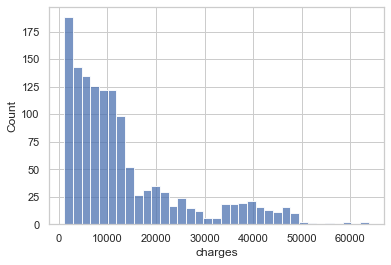

In [5]:
# how does the variable we want to predict is distributed
sns.histplot(data=df['charges'], bins=35)

In [6]:
# Since values greater than 50000 are outliers, we remove them
df = df[df.charges<50000]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,"16,884.9240"
1,18,male,33.7700,1,no,southeast,"1,725.5523"
2,28,male,33.0000,3,no,southeast,"4,449.4620"
3,33,male,22.7050,0,no,northwest,"21,984.4706"
4,32,male,28.8800,0,no,northwest,"3,866.8552"
...,...,...,...,...,...,...,...
1333,50,male,30.9700,3,no,northwest,"10,600.5483"
1334,18,female,31.9200,0,no,northeast,"2,205.9808"
1335,18,female,36.8500,0,no,southeast,"1,629.8335"
1336,21,female,25.8000,0,no,southwest,"2,007.9450"


### Correlation between variables

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14580\1083020458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


<AxesSubplot:>

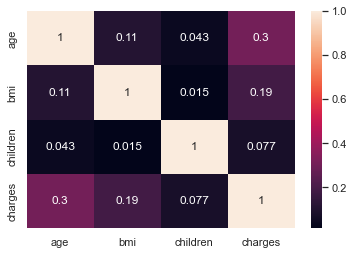

In [7]:
sns.heatmap(data=df.corr(), annot=True)

In [8]:
# turning categorical data into numerical
num_df = pd.get_dummies(data=df, columns=['sex','smoker','region'], drop_first=True)
num_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9000,0,"16,884.9240",0,1,0,0,1
1,18,33.7700,1,"1,725.5523",1,0,0,1,0
2,28,33.0000,3,"4,449.4620",1,0,0,1,0
3,33,22.7050,0,"21,984.4706",1,0,1,0,0
4,32,28.8800,0,"3,866.8552",1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.9700,3,"10,600.5483",1,0,1,0,0
1334,18,31.9200,0,"2,205.9808",0,0,0,0,0
1335,18,36.8500,0,"1,629.8335",0,0,0,1,0
1336,21,25.8000,0,"2,007.9450",0,0,0,0,1


<AxesSubplot:>

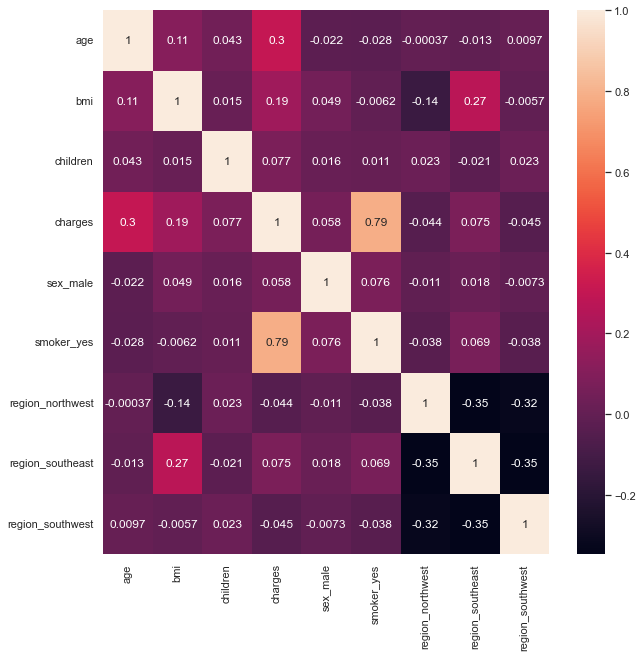

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=num_df.corr(), annot=True)

### First model

In [10]:
!pip install setuptools==58
!pip install regressors

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
x_cols = list(set(num_df.columns)-set(['charges']))
y_col = ['charges']

x = num_df[x_cols].values
y = num_df[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x,y)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [26]:
y_pred.shape

(333, 1)

### Metric functions
The next step is to create the functions we are going to use to evaluate the model

In [14]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.7585
mse:  0.2582


Our R2 indicates how well our model predicts the data we have. A model with an R2 between 1 and 0.95 predicts almost perfectly for those specific data, but this can be negative for making inferences on other data.

An R2 between 0.95 and 0.85 is considered optimal, meanwhile an R2 between 0.85 and 0.7 is still useful for predictions but with a higher margin of error.

The mse 'Mean Square Error' tell us how far away is the regresion line from the date in average, this number should be the near to 0 as possilbe

In [15]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [16]:
y_test = y_test.reshape(-1)

print('===========Summary=========')
stats.summary(model, x_test, y_test, x_cols)

===========Summary=========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8153 -0.1091  0.0966 0.2520 0.9263


Coefficients:
                  Estimate  Std. Error  t value  p value
_intercept          0.0047      0.0282   0.1664   0.8680
region_northwest   -0.0157      0.0345  -0.4546   0.6497
bmi                 0.1671      0.0296   5.6450   0.0000
sex_male            0.0061      0.0280   0.2167   0.8286
region_southwest   -0.0355      0.0317  -1.1176   0.2645
age                 0.2975      0.0283  10.5048   0.0000
smoker_yes          0.8014      0.0262  30.5525   0.0000
children            0.0461      0.0266   1.7312   0.0843
region_southeast   -0.0459      0.0326  -1.4082   0.1600
---
R-squared:  0.75854,    Adjusted R-squared:  0.75258
F-statistic: 127.23 on 8 features


This coefficients allow us to see which variables better predict our dependent variable. The most relevant information is the 'p-value.' Variables with a p-value less than 0.05 are the ones that best fit the model. The remaining variables with a p-value greater than 0.05 could be removed from the model

<function matplotlib.pyplot.show(close=None, block=None)>

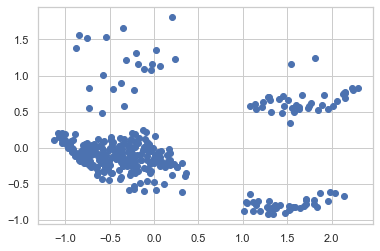

In [17]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show

### Second Model
The results of our first model are good but we can improve them, that is why we are going to make a second linear regression model with a few changes.

In [19]:
# creating some extra columns
df_second = num_df.copy()
df_second['age2'] = df_second.age**2
df_second['overweight'] = (df_second.bmi >= 30).astype(int)
df_second['overweight&smoker'] = df_second.overweight * df_second.smoker_yes

df_second

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,overweight,overweight&smoker
0,19,27.9000,0,"16,884.9240",0,1,0,0,1,361,0,0
1,18,33.7700,1,"1,725.5523",1,0,0,1,0,324,1,0
2,28,33.0000,3,"4,449.4620",1,0,0,1,0,784,1,0
3,33,22.7050,0,"21,984.4706",1,0,1,0,0,1089,0,0
4,32,28.8800,0,"3,866.8552",1,0,1,0,0,1024,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.9700,3,"10,600.5483",1,0,1,0,0,2500,1,0
1334,18,31.9200,0,"2,205.9808",0,0,0,0,0,324,1,0
1335,18,36.8500,0,"1,629.8335",0,0,0,1,0,324,1,0
1336,21,25.8000,0,"2,007.9450",0,0,0,0,1,441,0,0


In [20]:
x_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

x = df_second[x_cols].values
y = df_second[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x,y)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [21]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.8548
mse:  0.1299


Our R2 indicates how well our model predicts the data we have. A model with an R2 between 1 and 0.95 predicts almost perfectly for those specific data, but this can be negative for making inferences on other data.

An R2 between 0.95 and 0.85 is considered optimal, meanwhile an R2 between 0.85 and 0.7 is still useful for predictions but with a higher margin of error.

The mse 'Mean Square Error' tell us how far away is the regresion line from the date in average, this number should be the near to 0 as possilbe

In [22]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [23]:
y_test = y_test.reshape(-1)

print('===========Summary=========')
stats.summary(model, x_test, y_test, x_cols)

===========Summary=========
Residuals:
    Min     1Q  Median     3Q    Max
-1.8338 0.0696  0.1126 0.1464 1.4679


Coefficients:
                   Estimate  Std. Error  t value  p value
_intercept           0.0051      0.0199   0.2548   0.7990
region_northwest    -0.0230      0.0234  -0.9797   0.3280
bmi                  0.0616      0.0307   2.0071   0.0456
age2                 0.3355      0.1071   3.1335   0.0019
sex_male            -0.0098      0.0199  -0.4955   0.6206
region_southwest    -0.0435      0.0230  -1.8912   0.0595
age                 -0.0144      0.1062  -0.1359   0.8920
smoker_yes           0.4659      0.0272  17.1075   0.0000
children             0.0598      0.0202   2.9580   0.0033
overweight&smoker    0.4963      0.0288  17.2410   0.0000
region_southeast    -0.0354      0.0236  -1.4973   0.1353
overweight          -0.0435      0.0305  -1.4288   0.1540
---
R-squared:  0.85480,    Adjusted R-squared:  0.84983
F-statistic: 171.80 on 11 features


This coefficients allow us to see which variables better predict our dependent variable. The most relevant information is the 'p-value.' Variables with a p-value less than 0.05 are the ones that best fit the model. The remaining variables with a p-value greater than 0.05 could be removed from the model

<function matplotlib.pyplot.show(close=None, block=None)>

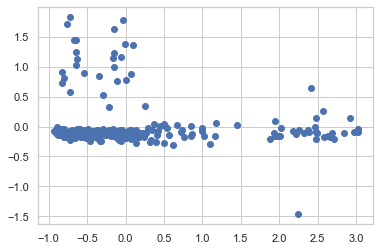

In [24]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show